In [2]:
import numpy as np
import xarray as xr
from scipy.interpolate import griddata
import scipy.stats as sts
import matplotlib.patches as mpatches
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
nw_route = xr.open_dataset(pd + 'Northwest_Passage_Model_Route_CESMV2.nc')
n_route = xr.open_dataset(pd + 'Northern_Sea_Model_Route_CESMV2.nc')

In [5]:
n_inds = np.stack([n_route['cesmrow'][:].data,n_route['cesmcol'][:].data],axis=1)
tmp,nvals = np.unique(n_inds, axis=0, return_index=True)
n_inds_u = n_inds[sorted(nvals)]
n_dist_u = n_route['distance'][sorted(nvals)].data
n_lon = n_route['longitude'][sorted(nvals)].data
n_lat = n_route['latitude'][sorted(nvals)].data
del tmp

In [6]:
nw_inds = np.stack([nw_route['cesmrow'][:].data,nw_route['cesmcol'][:].data],axis=1)
tmp,nwvals = np.unique(nw_inds, axis=0, return_index=True)
nw_inds_u = nw_inds[sorted(nwvals)]
nw_dist_u = nw_route['distance'][sorted(nwvals)].data
nw_lon = nw_route['longitude'][sorted(nwvals)].data
nw_lat = nw_route['latitude'][sorted(nwvals)].data
del tmp

In [7]:
tmp = xr.open_dataset('.../LY1_CESM_DPLE_aice_hi_taylordiag.nc')
tarea = tmp['tarea'].data
n_tarea = tarea[np.int32(n_inds_u[:,0]-280),np.int32(n_inds_u[:,1])]
nw_tarea = tarea[np.int32(nw_inds_u[:,0]-280),np.int32(nw_inds_u[:,1])]
print(n_tarea.shape,nw_tarea.shape)

(203,) (191,)


In [8]:
icesat = xr.open_dataset(pd + 'kwok_icesat.nc')
lat_sat = icesat['latitude'].data
lon_sat = icesat['longitude'].data


icesat_data = np.ones([10,140,140])*np.nan
icesat_data[0] = icesat['h_fm04'].data
icesat_data[1] = icesat['h_fm05'].data
icesat_data[2] = icesat['h_fm06'].data
icesat_data[3] = icesat['h_ma07'].data
icesat_data[4] = icesat['h_fm08'].data
icesat_data[5] = icesat['h_on03'].data
icesat_data[6] = icesat['h_on04'].data
icesat_data[7] = icesat['h_on05'].data
icesat_data[8] = icesat['h_on06'].data
icesat_data[9] = icesat['h_on07'].data

icesat_data[icesat_data <= 0] = np.nan

In [9]:
points = np.stack([lat_sat.reshape(-1),lon_sat.reshape(-1)],axis=1)
values = icesat_data.reshape([10,-1])

route_n = np.stack([n_lat,n_lon],axis=1)
route_nw = np.stack([nw_lat,nw_lon],axis=1)

In [10]:
route_n.shape,points.shape,values.shape

((203, 2), (19600, 2), (10, 19600))

In [11]:
icesat_route_n = np.ones([10,n_lon.shape[0]])*np.nan
icesat_route_nw = np.ones([10,nw_lon.shape[0]])*np.nan

for i in range(10):
    tmp_values = np.copy(values[i])
    mask = np.isnan(tmp_values)
    tmp_points = np.copy(points)
    icesat_route_n[i] = griddata(tmp_points, tmp_values, route_n, method='linear')
    icesat_route_nw[i] = griddata(tmp_points, tmp_values, route_nw, method='linear')
    del tmp_values,tmp_points
    

In [12]:
models = ['CESM2','CESM2-WACCM-FV2']

In [ ]:
n_cesm2 = np.ones([10,11,n_lon.shape[0]])*np.nan
nw_cesm2 = np.ones([10,11,nw_lon.shape[0]])*np.nan

model = models[0]
nens = len(glob.glob(pd +  'sithick_' + model + '_*npz'))
for n in range(nens)[:]:
    file = glob.glob(pd + 'sithick_' + model + '_r' + str(int(n+1)) + 'i1p1*.npz')[0]
    print(file)
    tmp = np.load(file)
    tmp_dat = tmp['n_route'].reshape([35,12,527])[:,:,sorted(nvals)]
    n_cesm2[0,n] = np.nanmean(tmp_dat[24,1:3],axis=0)
    n_cesm2[1,n] = np.nanmean(tmp_dat[25,1:3],axis=0)
    n_cesm2[2,n] = np.nanmean(tmp_dat[26,1:3],axis=0)
    n_cesm2[3,n] = np.nanmean(tmp_dat[27,2:4],axis=0)
    n_cesm2[4,n] = np.nanmean(tmp_dat[28,1:3],axis=0)
    n_cesm2[5,n] = np.nanmean(tmp_dat[23,9:11],axis=0)
    n_cesm2[6,n] = np.nanmean(tmp_dat[24,9:11],axis=0)
    n_cesm2[7,n] = np.nanmean(tmp_dat[25,9:11],axis=0)
    n_cesm2[8,n] = np.nanmean(tmp_dat[26,9:11],axis=0)
    n_cesm2[9,n] = np.nanmean(tmp_dat[27,9:11],axis=0)
    del tmp_dat
    tmp_dat = tmp['nw_route'].reshape([35,12,486])[:,:,sorted(nwvals)]
    nw_cesm2[0,n] = np.nanmean(tmp_dat[24,1:3],axis=0)
    nw_cesm2[1,n] = np.nanmean(tmp_dat[25,1:3],axis=0)
    nw_cesm2[2,n] = np.nanmean(tmp_dat[26,1:3],axis=0)
    nw_cesm2[3,n] = np.nanmean(tmp_dat[27,2:4],axis=0)
    nw_cesm2[4,n] = np.nanmean(tmp_dat[28,1:3],axis=0)
    nw_cesm2[5,n] = np.nanmean(tmp_dat[23,9:11],axis=0)
    nw_cesm2[6,n] = np.nanmean(tmp_dat[24,9:11],axis=0)
    nw_cesm2[7,n] = np.nanmean(tmp_dat[25,9:11],axis=0)
    nw_cesm2[8,n] = np.nanmean(tmp_dat[26,9:11],axis=0)
    nw_cesm2[9,n] = np.nanmean(tmp_dat[27,9:11],axis=0)
    

In [ ]:
n_cesm2w = np.ones([10,3,n_lon.shape[0]])*np.nan
nw_cesm2w = np.ones([10,3,nw_lon.shape[0]])*np.nan

model = models[1]
nens = len(glob.glob(pd +  'sithick_' + model + '_*npz'))
for n in range(nens)[:]:
    file = glob.glob(pd + 'sithick_' + model + '_r' + str(int(n+1)) + 'i1p1*.npz')[0]
    print(file)
    tmp = np.load(file)
    tmp_dat = tmp['n_route'].reshape([35,12,527])[:,:,sorted(nvals)]
    n_cesm2w[0,n] = np.nanmean(tmp_dat[24,1:3],axis=0)
    n_cesm2w[1,n] = np.nanmean(tmp_dat[25,1:3],axis=0)
    n_cesm2w[2,n] = np.nanmean(tmp_dat[26,1:3],axis=0)
    n_cesm2w[3,n] = np.nanmean(tmp_dat[27,2:4],axis=0)
    n_cesm2w[4,n] = np.nanmean(tmp_dat[28,1:3],axis=0)
    n_cesm2w[5,n] = np.nanmean(tmp_dat[23,9:11],axis=0)
    n_cesm2w[6,n] = np.nanmean(tmp_dat[24,9:11],axis=0)
    n_cesm2w[7,n] = np.nanmean(tmp_dat[25,9:11],axis=0)
    n_cesm2w[8,n] = np.nanmean(tmp_dat[26,9:11],axis=0)
    n_cesm2w[9,n] = np.nanmean(tmp_dat[27,9:11],axis=0)
    del tmp_dat
    tmp_dat = tmp['nw_route'].reshape([35,12,486])[:,:,sorted(nwvals)]
    nw_cesm2w[0,n] = np.nanmean(tmp_dat[24,1:3],axis=0)
    nw_cesm2w[1,n] = np.nanmean(tmp_dat[25,1:3],axis=0)
    nw_cesm2w[2,n] = np.nanmean(tmp_dat[26,1:3],axis=0)
    nw_cesm2w[3,n] = np.nanmean(tmp_dat[27,2:4],axis=0)
    nw_cesm2w[4,n] = np.nanmean(tmp_dat[28,1:3],axis=0)
    nw_cesm2w[5,n] = np.nanmean(tmp_dat[23,9:11],axis=0)
    nw_cesm2w[6,n] = np.nanmean(tmp_dat[24,9:11],axis=0)
    nw_cesm2w[7,n] = np.nanmean(tmp_dat[25,9:11],axis=0)
    nw_cesm2w[8,n] = np.nanmean(tmp_dat[26,9:11],axis=0)
    nw_cesm2w[9,n] = np.nanmean(tmp_dat[27,9:11],axis=0)
    

In [15]:
tmp = np.load('.../dple_aice_hi_NSR_NWP_icesat.npz')
n_routes_dp = tmp['n_routes_dp'][:,:,:,sorted(nvals)]
nw_routes_dp = tmp['nw_routes_dp'][:,:,:,sorted(nwvals)]
print(n_routes_dp.shape,nw_routes_dp.shape)

(4, 2, 10, 203) (4, 2, 10, 191)


In [17]:
def calc_stats(mod,ref):
    nens = mod.shape[1]
    print(nens)
    mod_stats = np.ones([10,nens,4])*np.nan
    for i in range(10)[:]:
        for j in range(nens)[:]:
            msk = np.logical_or(np.isnan(mod[i,j]),np.isnan(ref[i]))
            mod_stats[i,j,:2] = sts.pearsonr(mod[i,j,~msk],ref[i,~msk])
            tmp = ref[i,~msk].std(ddof=1)
            mod_stats[i,j,2] = mod[i,j,~msk].std(ddof=1)/tmp
            tmp1 = (((mod[i,j,~msk] - mod[i,j,~msk].mean()) - (ref[i,~msk] - ref[i,~msk].mean()))**2)
            mod_stats[i,j,3] = np.sqrt(tmp1.mean())/tmp
            #print(tmp,np.sqrt(tmp1.mean())/tmp)
            
    return mod_stats
            
msn = calc_stats(n_cesm2,icesat_route_n)
msnw = calc_stats(nw_cesm2,icesat_route_nw)

n_cesm2_rsr_fall = msn[5:,:,[0,2,3]].mean(axis=0)
n_cesm2_rsr_spring = msn[:5,:,[0,2,3]].mean(axis=0)

nw_cesm2_rsr_fall = msnw[5:,:,[0,2,3]].mean(axis=0)
nw_cesm2_rsr_spring = msnw[:5,:,[0,2,3]].mean(axis=0)

11
11


In [95]:
msn = calc_stats(n_cesm2w,icesat_route_n)
msnw = calc_stats(nw_cesm2w,icesat_route_nw)

n_cesm2w_rsr_fall = msn[5:,:,[0,2,3]].mean(axis=0)
n_cesm2w_rsr_spring = msn[:5,:,[0,2,3]].mean(axis=0)

nw_cesm2w_rsr_fall = msnw[5:,:,[0,2,3]].mean(axis=0)
nw_cesm2w_rsr_spring = msnw[:5,:,[0,2,3]].mean(axis=0)

3
3


In [96]:
#msn = calc_stats(np.swapaxes(n_routes_dp[:,1],0,1),icesat_route_n)
#msnw = calc_stats(np.swapaxes(nw_routes_dp[:,1],0,1),icesat_route_nw)

msn = calc_stats(np.swapaxes(100*n_routes_dp[:,1]/n_routes_dp[:,0],0,1),icesat_route_n)
msnw = calc_stats(np.swapaxes(100*nw_routes_dp[:,1]/nw_routes_dp[:,0],0,1),icesat_route_nw)


n_dp_rsr_fall = msn[5:,:,[0,2,3]].mean(axis=0)
n_dp_rsr_spring = msn[:5,:,[0,2,3]].mean(axis=0)

nw_dp_rsr_fall = msnw[5:,:,[0,2,3]].mean(axis=0)
nw_dp_rsr_spring = msnw[:5,:,[0,2,3]].mean(axis=0)

4
4


In [97]:
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.floating_axes as fa
import mpl_toolkits.axisartist.grid_finder as gf

In [98]:
def taylor_diag(fig,mod_data = np.array([.5,.5]).reshape([1,-1]),mod_labs=['test'],mod_col=['r']*11,corr_min=-0.7,std_max=3.):
    tr = PolarAxes.PolarTransform()
    rlocs = np.array([-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0])
    tlocs = np.arccos(rlocs) 
    gl1 = gf.FixedLocator(tlocs)
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
    
    xlocs = [ .5,1,1.5,2.,2.5]
    gl2 = gf.MaxNLocator((3.0-0)//.5)
    xf2 = gf.DictFormatter(dict(zip(xlocs, ['0.50','1.00','1.50','2.00','2.50'])))

    ghelper = fa.GridHelperCurveLinear(tr,extremes=(0, np.arccos(corr_min), 0, std_max),\
                                   grid_locator1=gl1, grid_locator2=gl2,tick_formatter1=tf1,tick_formatter2=xf2)
    ax = fa.FloatingSubplot(fig, 111, grid_helper=ghelper)
    fig.add_subplot(ax)
    
    ax.axis["top"].set_axis_direction("bottom")   # "Angle axis"
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Correlation")
    ax.axis["top"].label.set_fontsize(16)
    ax.axis["top"].major_ticklabels.set(size=14, family="serif")

    ax.axis["left"].set_axis_direction("bottom")  # "X axis"
    ax.axis["left"].label.set_text("Normalized Standard deviation")
    ax.axis["left"].label.set_fontsize(16)
    ax.axis["left"].major_ticklabels.set(size=14, family="serif")

    ax.axis["right"].set_axis_direction("top")    # "Y-axis"
    ax.axis["right"].toggle(ticklabels=False)
    ax.axis["right"].major_ticklabels.set_axis_direction("left")
    ax.axis["right"].major_ticklabels.set(size=14, family="serif")

    ax.axis["bottom"].set_visible(False)
    
    _ax = ax                   # Graphical axes
    ax = ax.get_aux_axes(tr)   # Polar coordinates

    l, = ax.plot([0.005], 1., 'rs',ls='', ms=10, label='ICESat')
    t = np.linspace(0, np.arccos(corr_min),200)
    ax.plot(t, np.zeros_like(t) + 1., 'k-',lw=1.5)
    ax.plot(t, np.zeros_like(t) + std_max, 'k-',lw=1.)
    for x in xlocs[1:]:
        ax.plot(t, np.zeros_like(t) + x, 'k--',lw=.5)
    
    for t in tlocs[1:-1]:
        ax.plot([t,t],[0,std_max],'--',color='k',lw=.5)
    
    ax.plot([tlocs[0],tlocs[0]],[0,std_max],'-',color='k',lw=1.5)
    ax.plot([tlocs[-1],tlocs[-1]],[0,std_max],'-',color='k',lw=1.5)
    
    rs, ts = np.meshgrid(np.linspace(0, std_max,100),np.linspace(0, np.arccos(corr_min),100))
    rms = np.sqrt(1**2 + rs**2 - 2*1*rs*np.cos(ts))
    qss = ((((1 + np.cos(ts))*rs*1.)/(1.**2 + rs**2)))**2
    contours = ax.contour(ts, rs, rms, 6,linewidths=[1],linestyle='--',colors=sns.xkcd_rgb['light blue'])
    #contours = ax.contour(ts, rs, qss, 9,colors='b',linewidths=[1],linestyle='--')
    clab=ax.clabel(contours, inline=0, fontsize=14, fmt='%.1f',colors=sns.xkcd_rgb['dark grey'])
    cpos = [(np.arccos(.97), 1.6),(np.arccos(.97), 2.2),(np.arccos(.97), 2.8),(np.arccos(.55), 2.87),(np.arccos(.15), 2.86)]
    crot = [310,305,300,-10,10]
    for i,t in enumerate(clab[:5]):
        t.set_position(cpos[i])
        t.set_rotation(crot[i])
    clab[5].set_visible(False)
    ax.plot(2,7,'s',markeredgecolor='k',markeredgewidth=1.,alpha=.3,color=mod_col[0],ms=10,label='CESM2')
    ax.plot(2,7,'s',markeredgecolor='k',markeredgewidth=1.,alpha=.3,color=mod_col[11],ms=10,label='CESM2-WACCM-FV2')
    ax.plot(2,7,'s',markeredgecolor='k',markeredgewidth=1.,alpha=.3,color=mod_col[14],ms=10,label='CESM-DPLE')

    for i,m in enumerate(mod_data):
        if i == 17:
            ax.plot(np.arccos(mod_data[i,0]),mod_data[i,1],'s',markeredgecolor='k',markeredgewidth=.5,alpha=.2,color=mod_col[i],ms=18)
            ax.plot(np.arccos(mod_data[i,0]),mod_data[i,1],'s',markeredgecolor='k',markeredgewidth=.8,fillstyle='none',color=mod_col[i],ms=18)

            ax.text(np.arccos(mod_data[i,0]-.01),mod_data[i,1],mod_labs[i],fontsize=11,ha='center',va='center',fontweight='demibold')

        else:
            ax.plot(np.arccos(mod_data[i,0]),mod_data[i,1],'s',markeredgecolor='k',markeredgewidth=.5,alpha=.2,color=mod_col[i],ms=18)
            ax.plot(np.arccos(mod_data[i,0]),mod_data[i,1],'s',markeredgecolor='k',markeredgewidth=.8,fillstyle='none',color=mod_col[i],ms=18)

            ax.text(np.arccos(mod_data[i,0]),mod_data[i,1],mod_labs[i],fontsize=11,ha='center',va='center',fontweight='semibold')
         
    leg = plt.legend(loc=0,fontsize=14,bbox_to_anchor = [.32, .32],frameon=False)
    plt.setp(leg.texts, family='serif')
        
    return ax,clab

18 18 18


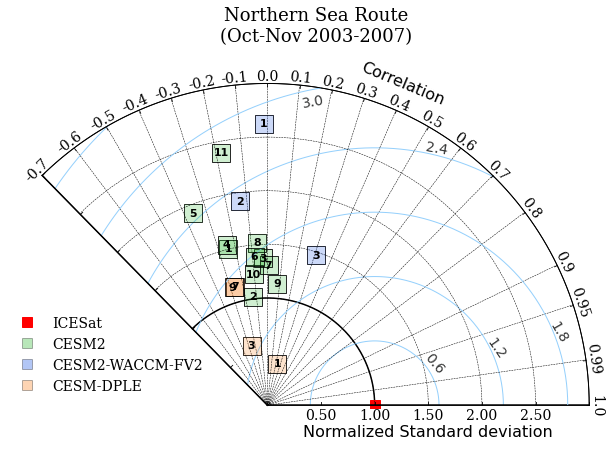

In [99]:
fig = plt.figure(figsize=(10,8))
mod_data = np.vstack([n_cesm2_rsr_fall,n_cesm2w_rsr_fall,n_dp_rsr_fall])
mod_col=[sns.xkcd_rgb['green']]*11 + [sns.xkcd_rgb['blue']]*3 + [sns.xkcd_rgb['orange']]*4
mod_labs= list(range(1,12)) + list(range(1,4)) + list([1,3,7,9])
print(len(mod_data),len(mod_labs),len(mod_col))
ax,c = taylor_diag(fig,mod_data=mod_data,mod_labs=mod_labs,mod_col=mod_col)
plt.title('Northern Sea Route\n(Oct-Nov 2003-2007)',fontsize=18,y=1.1,family='serif')

In [111]:
def taylor_diag_small(fig,mod_data = np.array([.5,.5]).reshape([1,-1]),mod_labs=['test'],mod_col=['r']*11,corr_min=-0.8,std_max=1.25):
    tr = PolarAxes.PolarTransform()
    rlocs = np.array([-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0])
    tlocs = np.arccos(rlocs) 
    gl1 = gf.FixedLocator(tlocs)
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
    
    #xlocs = [ .5,1,1.5,2.,2.5]
    #xlocs = [.25,.50,.75,1.0]
    xlocs = np.arange(0,std_max,.25)[1:]
    gl2 = gf.MaxNLocator((1.5-0)//.25)
    #xf2 = gf.DictFormatter(dict(zip(xlocs, ['0.50','1.00','1.50','2.00','2.50'])))
    xf2 = gf.DictFormatter(dict(zip(xlocs, ['%.2f' %x for x in xlocs])))

    ghelper = fa.GridHelperCurveLinear(tr,extremes=(0, np.arccos(corr_min), 0, std_max),\
                                   grid_locator1=gl1, grid_locator2=gl2,tick_formatter1=tf1,tick_formatter2=xf2)
    ax = fa.FloatingSubplot(fig, 111, grid_helper=ghelper)
    fig.add_subplot(ax)
    
    ax.axis["top"].set_axis_direction("bottom")   # "Angle axis"
    ax.axis["top"].toggle(ticklabels=True, label=True)
    ax.axis["top"].major_ticklabels.set_axis_direction("top")
    ax.axis["top"].label.set_axis_direction("top")
    ax.axis["top"].label.set_text("Correlation")
    ax.axis["top"].label.set_fontsize(16)
    ax.axis["top"].major_ticklabels.set(size=14, family="serif")

    ax.axis["left"].set_axis_direction("bottom")  # "X axis"
    ax.axis["left"].label.set_text("Normalized Standard deviation")
    ax.axis["left"].label.set_fontsize(16)
    ax.axis["left"].major_ticklabels.set(size=14, family="serif")

    ax.axis["right"].set_axis_direction("top")    # "Y-axis"
    ax.axis["right"].toggle(ticklabels=False)
    ax.axis["right"].major_ticklabels.set_axis_direction("left")
    ax.axis["right"].major_ticklabels.set(size=14, family="serif")

    ax.axis["bottom"].set_visible(False)
    
    _ax = ax                   # Graphical axes
    ax = ax.get_aux_axes(tr)   # Polar coordinates

    l, = ax.plot([0.005], 1., 'rs',ls='', ms=10, label='ICESat')
    t = np.linspace(0, np.arccos(corr_min),200)
    ax.plot(t, np.zeros_like(t) + 1., 'k-',lw=1.5)
    ax.plot(t, np.zeros_like(t) + std_max, 'k-',lw=1.)
    for x in xlocs[1:]:
        ax.plot(t, np.zeros_like(t) + x, 'k--',lw=.5)
    
    for t in tlocs[1:-1]:
        ax.plot([t,t],[0,std_max],'--',color='k',lw=.5)
    
    ax.plot([tlocs[0],tlocs[0]],[0,std_max],'-',color='k',lw=1.5)
    ax.plot([tlocs[-1],tlocs[-1]],[0,std_max],'-',color='k',lw=1.5)
    
    rs, ts = np.meshgrid(np.linspace(0, std_max,100),np.linspace(0, np.arccos(corr_min),100))
    rms = np.sqrt(1**2 + rs**2 - 2*1*rs*np.cos(ts))
    qss = ((((1 + np.cos(ts))*rs*1.)/(1.**2 + rs**2)))**2
    contours = ax.contour(ts, rs, rms, 6,linewidths=[1],linestyle='--',colors=sns.xkcd_rgb['light blue'])
    #contours = ax.contour(ts, rs, qss, 9,colors='b',linewidths=[1],linestyle='--')
    clab=ax.clabel(contours, inline=0, fontsize=14, fmt='%.1f',colors=sns.xkcd_rgb['dark grey'])
    #Uncomment following two lines for NWP_FALL, NWP_SPRING
    cpos = [(np.arccos(.925), 1.14),(np.arccos(.67), 1.08),(np.arccos(.35), 1.16),(np.arccos(-.15), 1.16),(np.arccos(.03), 1.2)]
    crot = [350,10,30,30,40]
    
    # uncomment following 2 lines for NSR_Spring
    #cpos = [(np.arccos(.925), 1.14),(np.arccos(.76), 1.31),(np.arccos(.45), 1.32),(np.arccos(.05), 1.35),(np.arccos(.03), 1.2)]
    #crot = [350,10,30,30,40]

    for i,t in enumerate(clab[:4]):
        t.set_position(cpos[i])
        t.set_rotation(crot[i])
    clab[4].set_visible(False)
    ax.plot(2,7,'s',markeredgecolor='k',markeredgewidth=1.,alpha=.3,color=mod_col[0],ms=10,label='CESM2')
    ax.plot(2,7,'s',markeredgecolor='k',markeredgewidth=1.,alpha=.3,color=mod_col[11],ms=10,label='CESM2-WACCM-FV2')
    ax.plot(2,7,'s',markeredgecolor='k',markeredgewidth=1.,alpha=.3,color=mod_col[14],ms=10,label='CESM-DPLE')

    for i,m in enumerate(mod_data):
        if i == 17:
            ax.plot(np.arccos(mod_data[i,0]),mod_data[i,1],'s',markeredgecolor='k',markeredgewidth=.5,alpha=.2,color=mod_col[i],ms=18)
            ax.plot(np.arccos(mod_data[i,0]),mod_data[i,1],'s',markeredgecolor='k',markeredgewidth=.8,fillstyle='none',color=mod_col[i],ms=18)

            ax.text(np.arccos(mod_data[i,0]-.01),mod_data[i,1],mod_labs[i],fontsize=11,ha='center',va='center',fontweight='demibold')

        else:
            ax.plot(np.arccos(mod_data[i,0]),mod_data[i,1],'s',markeredgecolor='k',markeredgewidth=.5,alpha=.2,color=mod_col[i],ms=18)
            ax.plot(np.arccos(mod_data[i,0]),mod_data[i,1],'s',markeredgecolor='k',markeredgewidth=.8,fillstyle='none',color=mod_col[i],ms=18)

            ax.text(np.arccos(mod_data[i,0]),mod_data[i,1],mod_labs[i],fontsize=11,ha='center',va='center',fontweight='semibold')
         
    leg = plt.legend(loc=0,fontsize=14,bbox_to_anchor = [.32, .32],frameon=False)
    plt.setp(leg.texts, family='serif')
        
    return ax,clab

18 18 18


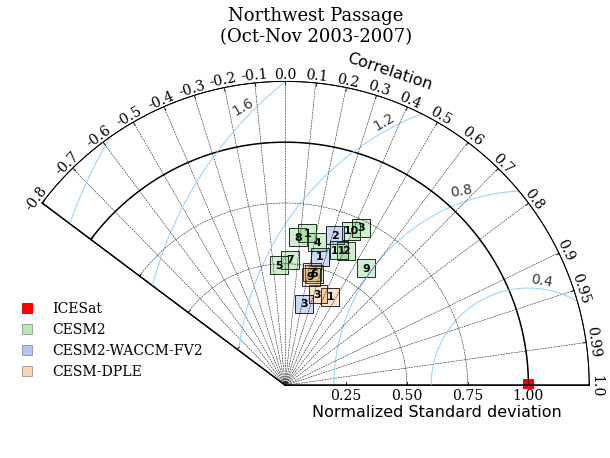

In [101]:
fig = plt.figure(figsize=(10,8))
mod_data = np.vstack([nw_cesm2_rsr_fall,nw_cesm2w_rsr_fall,nw_dp_rsr_fall])
mod_col=[sns.xkcd_rgb['green']]*11 + [sns.xkcd_rgb['blue']]*3 + [sns.xkcd_rgb['orange']]*4
mod_labs= list(range(1,12)) + list(range(1,4)) + list([1,3,7,9])
print(len(mod_data),len(mod_labs),len(mod_col))
ax,c = taylor_diag_small(fig,mod_data=mod_data,mod_labs=mod_labs,mod_col=mod_col)
plt.title('Northwest Passage\n(Oct-Nov 2003-2007)',fontsize=18,y=1.1,family='serif')


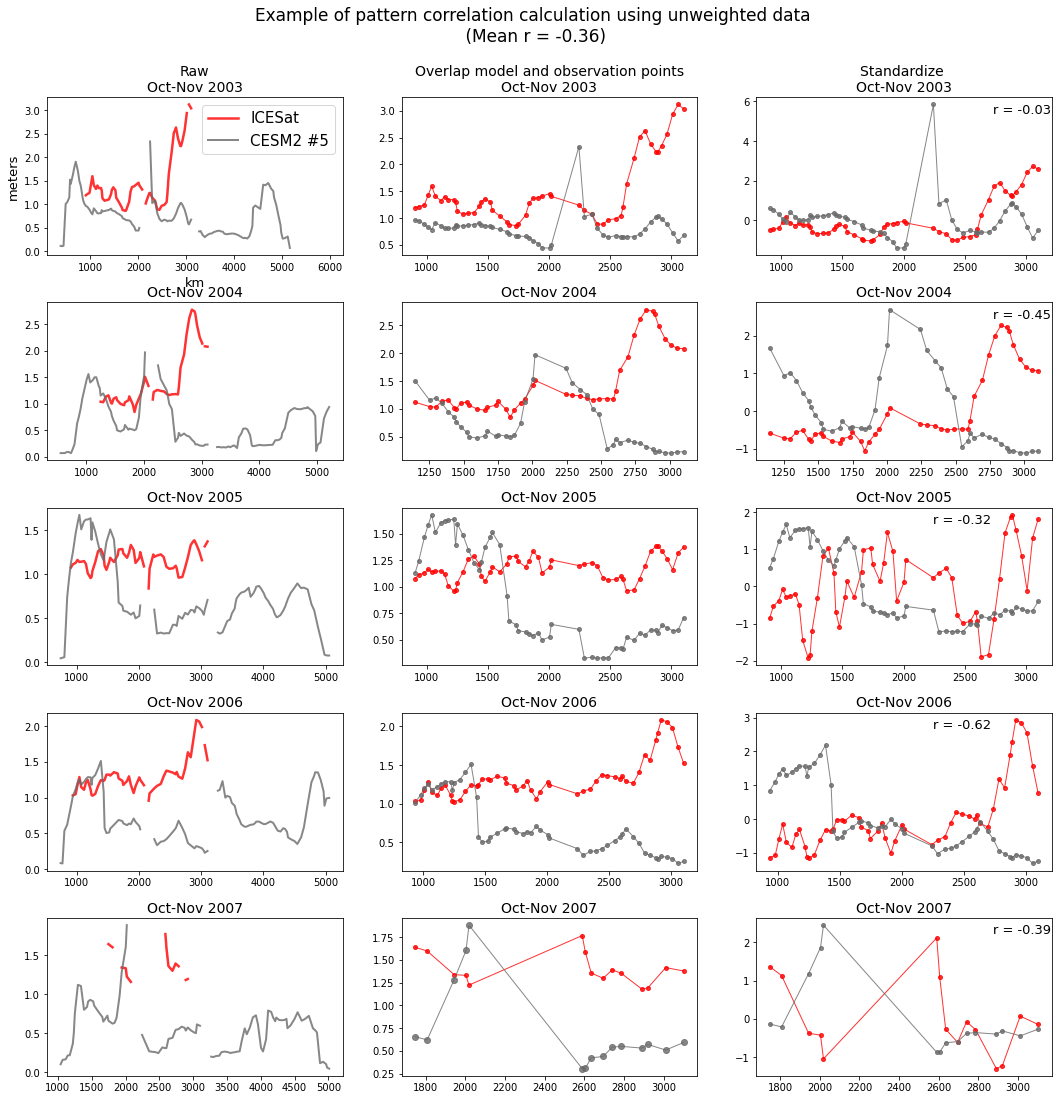

In [78]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(531)

plt.suptitle('Example of pattern correlation calculation using unweighted data\n (Mean r = -0.36)',fontsize=17,y=.95)
plt.sca(ax1)
plt.title('Raw\nOct-Nov 2003',fontsize=14)
ax1.plot(n_dist_u,icesat_route_n[5][::-1],'r-',lw=2.5,alpha=.8,label='ICESat')
ax1.plot(n_dist_u,n_cesm2[5,4][::-1],'-',color='dimgrey',lw=2.,alpha=.8,label='CESM2 #5')
ax1.legend(loc='best',fontsize=15)
plt.ylabel('meters',fontsize=13)
plt.xlabel('km',fontsize=13)

ax2 = fig.add_subplot(534)
plt.sca(ax2)
plt.title('Oct-Nov 2004',fontsize=14)
ax2.plot(n_dist_u,icesat_route_n[6][::-1],'r-',lw=2.5,alpha=.8,label='ICESat')
ax2.plot(n_dist_u,n_cesm2[6,4][::-1],'-',color='dimgrey',lw=2.,alpha=.8,label='CESM2 #5')
ax3 = fig.add_subplot(537)
plt.sca(ax3)
plt.title('Oct-Nov 2005',fontsize=14)
ax3.plot(n_dist_u,icesat_route_n[7][::-1],'r-',lw=2.5,alpha=.8,label='ICESat')
ax3.plot(n_dist_u,n_cesm2[7,4][::-1],'-',color='dimgrey',lw=2.,alpha=.8,label='CESM2 #5')
ax4 = fig.add_subplot(5,3,10)
plt.sca(ax4)
plt.title('Oct-Nov 2006',fontsize=14)
ax4.plot(n_dist_u,icesat_route_n[8][::-1],'r-',lw=2.5,alpha=.8,label='ICESat')
ax4.plot(n_dist_u,n_cesm2[8,4][::-1],'-',color='dimgrey',lw=2.,alpha=.8,label='CESM2 #5')
ax5 = fig.add_subplot(5,3,13)
plt.sca(ax5)
plt.title('Oct-Nov 2007',fontsize=14)
ax5.plot(n_dist_u,icesat_route_n[9][::-1],'r-',lw=2.5,alpha=.8,label='ICESat')
ax5.plot(n_dist_u,n_cesm2[9,4][::-1],'-',color='dimgrey',lw=2.,alpha=.8,label='CESM2 #5')

ax6 = fig.add_subplot(532)
plt.sca(ax6)
plt.title('Overlap model and observation points\nOct-Nov 2003',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[5,4][::-1]),np.isnan(icesat_route_n[5][::-1]))
ax6.plot(n_dist_u[~msk],icesat_route_n[5][::-1][~msk],'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax6.plot(n_dist_u[~msk],n_cesm2[5,4][::-1][~msk],'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax7 = fig.add_subplot(535)
plt.sca(ax7)
plt.title('Oct-Nov 2004',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[6,4][::-1]),np.isnan(icesat_route_n[6][::-1]))
ax7.plot(n_dist_u[~msk],icesat_route_n[6][::-1][~msk],'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax7.plot(n_dist_u[~msk],n_cesm2[6,4][::-1][~msk],'o-',ms=4,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax8 = fig.add_subplot(538)
plt.sca(ax8)
plt.title('Oct-Nov 2005',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[7,4][::-1]),np.isnan(icesat_route_n[7][::-1]))
ax8.plot(n_dist_u[~msk],icesat_route_n[7][::-1][~msk],'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax8.plot(n_dist_u[~msk],n_cesm2[7,4][::-1][~msk],'o-',ms=4,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax9 = fig.add_subplot(5,3,11)
plt.sca(ax9)
plt.title('Oct-Nov 2006',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[8,4][::-1]),np.isnan(icesat_route_n[8][::-1]))
ax9.plot(n_dist_u[~msk],icesat_route_n[8][::-1][~msk],'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax9.plot(n_dist_u[~msk],n_cesm2[8,4][::-1][~msk],'o-',ms=4,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax10 = fig.add_subplot(5,3,14)
plt.sca(ax10)
plt.title('Oct-Nov 2007',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[9,4][::-1]),np.isnan(icesat_route_n[9][::-1]))
ax10.plot(n_dist_u[~msk],icesat_route_n[9][::-1][~msk],'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax10.plot(n_dist_u[~msk],n_cesm2[9,4][::-1][~msk],'o-',color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')

ax11 = fig.add_subplot(5,3,3)
plt.sca(ax11)
plt.title('Standardize \nOct-Nov 2003',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[5,4][::-1]),np.isnan(icesat_route_n[5][::-1]))
ax11.plot(n_dist_u[~msk],(icesat_route_n[5][::-1][~msk] - icesat_route_n[5][::-1][~msk].mean())/icesat_route_n[5][::-1][~msk].std(ddof=1),'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax11.plot(n_dist_u[~msk],(n_cesm2[5,4][::-1][~msk]-n_cesm2[5,4][::-1][~msk].mean())/n_cesm2[5,4][::-1][~msk].std(ddof=1),'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax11.text(.8,.9,'r = %.2f' %(sts.pearsonr(icesat_route_n[5][::-1][~msk],n_cesm2[5,4][::-1][~msk])[0]),fontsize=13,transform=ax11.transAxes)
ax12 = fig.add_subplot(536)
plt.sca(ax12)
plt.title('Oct-Nov 2004',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[6,4][::-1]),np.isnan(icesat_route_n[6][::-1]))
ax12.plot(n_dist_u[~msk],(icesat_route_n[6][::-1][~msk] - icesat_route_n[6][::-1][~msk].mean())/icesat_route_n[6][::-1][~msk].std(ddof=1),'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax12.plot(n_dist_u[~msk],(n_cesm2[6,4][::-1][~msk]-n_cesm2[6,4][::-1][~msk].mean())/n_cesm2[6,4][::-1][~msk].std(ddof=1),'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax12.text(.8,.9,'r = %.2f' %(sts.pearsonr(icesat_route_n[6][::-1][~msk],n_cesm2[6,4][::-1][~msk])[0]),fontsize=13,transform=ax12.transAxes)

ax13 = fig.add_subplot(539)
plt.sca(ax13)
plt.title('Oct-Nov 2005',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[7,4][::-1]),np.isnan(icesat_route_n[7][::-1]))
ax13.plot(n_dist_u[~msk],(icesat_route_n[7][::-1][~msk] - icesat_route_n[7][::-1][~msk].mean())/icesat_route_n[7][::-1][~msk].std(ddof=1),'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax13.plot(n_dist_u[~msk],(n_cesm2[7,4][::-1][~msk]-n_cesm2[7,4][::-1][~msk].mean())/n_cesm2[7,4][::-1][~msk].std(ddof=1),'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax13.text(.6,.9,'r = %.2f' %(sts.pearsonr(icesat_route_n[7][::-1][~msk],n_cesm2[7,4][::-1][~msk])[0]),fontsize=13,transform=ax13.transAxes)

ax14 = fig.add_subplot(5,3,12)
plt.sca(ax14)
plt.title('Oct-Nov 2006',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[8,4][::-1]),np.isnan(icesat_route_n[8][::-1]))
ax14.plot(n_dist_u[~msk],(icesat_route_n[8][::-1][~msk] - icesat_route_n[8][::-1][~msk].mean())/icesat_route_n[8][::-1][~msk].std(ddof=1),'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax14.plot(n_dist_u[~msk],(n_cesm2[8,4][::-1][~msk]-n_cesm2[8,4][::-1][~msk].mean())/n_cesm2[8,4][::-1][~msk].std(ddof=1),'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax14.text(.6,.9,'r = %.2f' %(sts.pearsonr(icesat_route_n[8][::-1][~msk],n_cesm2[8,4][::-1][~msk])[0]),fontsize=13,transform=ax14.transAxes)

ax15 = fig.add_subplot(5,3,15)
plt.sca(ax15)
plt.title('Oct-Nov 2007',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[9,4][::-1]),np.isnan(icesat_route_n[9][::-1]))
ax15.plot(n_dist_u[~msk],(icesat_route_n[9][::-1][~msk] - icesat_route_n[9][::-1][~msk].mean())/icesat_route_n[9][::-1][~msk].std(ddof=1),'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax15.plot(n_dist_u[~msk],(n_cesm2[9,4][::-1][~msk]-n_cesm2[9,4][::-1][~msk].mean())/n_cesm2[9,4][::-1][~msk].std(ddof=1),'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax15.text(.8,.9,'r = %.2f' %(sts.pearsonr(icesat_route_n[9][::-1][~msk],n_cesm2[9,4][::-1][~msk])[0]),fontsize=13,transform=ax15.transAxes)

plt.subplots_adjust(hspace=.3)


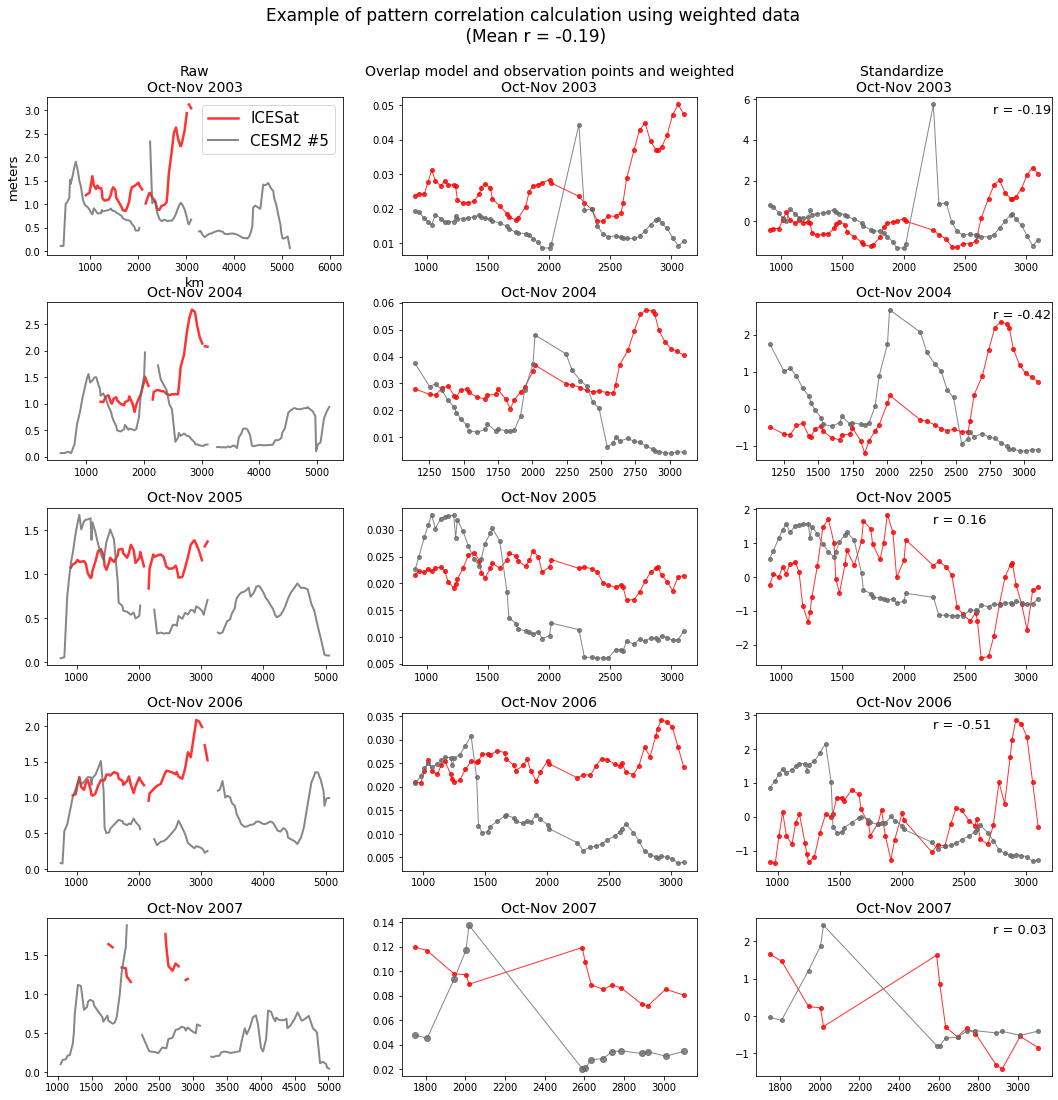

In [77]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(531)

plt.suptitle('Example of pattern correlation calculation using weighted data\n (Mean r = -0.19)',fontsize=17,y=.95)
plt.sca(ax1)
plt.title('Raw\nOct-Nov 2003',fontsize=14)
ax1.plot(n_dist_u,icesat_route_n[5][::-1],'r-',lw=2.5,alpha=.8,label='ICESat')
ax1.plot(n_dist_u,n_cesm2[5,4][::-1],'-',color='dimgrey',lw=2.,alpha=.8,label='CESM2 #5')
ax1.legend(loc='best',fontsize=15)
plt.ylabel('meters',fontsize=13)
plt.xlabel('km',fontsize=13)

ax2 = fig.add_subplot(534)
plt.sca(ax2)
plt.title('Oct-Nov 2004',fontsize=14)
ax2.plot(n_dist_u,icesat_route_n[6][::-1],'r-',lw=2.5,alpha=.8,label='ICESat')
ax2.plot(n_dist_u,n_cesm2[6,4][::-1],'-',color='dimgrey',lw=2.,alpha=.8,label='CESM2 #5')
ax3 = fig.add_subplot(537)
plt.sca(ax3)
plt.title('Oct-Nov 2005',fontsize=14)
ax3.plot(n_dist_u,icesat_route_n[7][::-1],'r-',lw=2.5,alpha=.8,label='ICESat')
ax3.plot(n_dist_u,n_cesm2[7,4][::-1],'-',color='dimgrey',lw=2.,alpha=.8,label='CESM2 #5')
ax4 = fig.add_subplot(5,3,10)
plt.sca(ax4)
plt.title('Oct-Nov 2006',fontsize=14)
ax4.plot(n_dist_u,icesat_route_n[8][::-1],'r-',lw=2.5,alpha=.8,label='ICESat')
ax4.plot(n_dist_u,n_cesm2[8,4][::-1],'-',color='dimgrey',lw=2.,alpha=.8,label='CESM2 #5')
ax5 = fig.add_subplot(5,3,13)
plt.sca(ax5)
plt.title('Oct-Nov 2007',fontsize=14)
ax5.plot(n_dist_u,icesat_route_n[9][::-1],'r-',lw=2.5,alpha=.8,label='ICESat')
ax5.plot(n_dist_u,n_cesm2[9,4][::-1],'-',color='dimgrey',lw=2.,alpha=.8,label='CESM2 #5')

ax6 = fig.add_subplot(532)
plt.sca(ax6)
plt.title('Overlap model and observation points and weighted\nOct-Nov 2003',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[5,4][::-1]),np.isnan(icesat_route_n[5][::-1]))
tar =  np.copy(n_tarea)[::-1]
tar[msk] = np.nan
w = tar/tar[~msk].sum()
ax6.plot(n_dist_u[~msk],icesat_route_n[5][::-1][~msk]*w[~msk],'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax6.plot(n_dist_u[~msk],n_cesm2[5,4][::-1][~msk]*w[~msk],'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax7 = fig.add_subplot(535)
plt.sca(ax7)
plt.title('Oct-Nov 2004',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[6,4][::-1]),np.isnan(icesat_route_n[6][::-1]))
tar =  np.copy(n_tarea)[::-1]
tar[msk] = np.nan
w = tar/tar[~msk].sum()
ax7.plot(n_dist_u[~msk],icesat_route_n[6][::-1][~msk]*w[~msk],'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax7.plot(n_dist_u[~msk],n_cesm2[6,4][::-1][~msk]*w[~msk],'o-',ms=4,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax8 = fig.add_subplot(538)
plt.sca(ax8)
plt.title('Oct-Nov 2005',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[7,4][::-1]),np.isnan(icesat_route_n[7][::-1]))
tar =  np.copy(n_tarea)[::-1]
tar[msk] = np.nan
w = tar/tar[~msk].sum()
ax8.plot(n_dist_u[~msk],icesat_route_n[7][::-1][~msk]*w[~msk],'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax8.plot(n_dist_u[~msk],n_cesm2[7,4][::-1][~msk]*w[~msk],'o-',ms=4,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax9 = fig.add_subplot(5,3,11)
plt.sca(ax9)
plt.title('Oct-Nov 2006',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[8,4][::-1]),np.isnan(icesat_route_n[8][::-1]))
tar =  np.copy(n_tarea)[::-1]
tar[msk] = np.nan
w = tar/tar[~msk].sum()
ax9.plot(n_dist_u[~msk],icesat_route_n[8][::-1][~msk]*w[~msk],'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax9.plot(n_dist_u[~msk],n_cesm2[8,4][::-1][~msk]*w[~msk],'o-',ms=4,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax10 = fig.add_subplot(5,3,14)
plt.sca(ax10)
plt.title('Oct-Nov 2007',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[9,4][::-1]),np.isnan(icesat_route_n[9][::-1]))
tar =  np.copy(n_tarea)[::-1]
tar[msk] = np.nan
w = tar/tar[~msk].sum()
ax10.plot(n_dist_u[~msk],icesat_route_n[9][::-1][~msk]*w[~msk],'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax10.plot(n_dist_u[~msk],n_cesm2[9,4][::-1][~msk]*w[~msk],'o-',color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')

ax11 = fig.add_subplot(5,3,3)
plt.sca(ax11)
plt.title('Standardize \nOct-Nov 2003',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[5,4][::-1]),np.isnan(icesat_route_n[5][::-1]))
tar =  np.copy(n_tarea)[::-1]
tar[msk] = np.nan
w = tar/tar[~msk].sum()
ax11.plot(n_dist_u[~msk],(icesat_route_n[5][::-1][~msk]*w[~msk] - (icesat_route_n[5][::-1][~msk]*w[~msk]).mean())/(icesat_route_n[5][::-1][~msk]*w[~msk]).std(ddof=1),'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax11.plot(n_dist_u[~msk],(n_cesm2[5,4][::-1][~msk]*w[~msk]-(n_cesm2[5,4][::-1][~msk]*w[~msk]).mean())/(n_cesm2[5,4][::-1][~msk]*w[~msk]).std(ddof=1),'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax11.text(.8,.9,'r = %.2f' %(sts.pearsonr(icesat_route_n[5][::-1][~msk]*w[~msk],n_cesm2[5,4][::-1][~msk]*w[~msk])[0]),fontsize=13,transform=ax11.transAxes)
ax12 = fig.add_subplot(536)
plt.sca(ax12)
plt.title('Oct-Nov 2004',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[6,4][::-1]),np.isnan(icesat_route_n[6][::-1]))
tar =  np.copy(n_tarea)[::-1]
tar[msk] = np.nan
w = tar/tar[~msk].sum()
ax12.plot(n_dist_u[~msk],(icesat_route_n[6][::-1][~msk]*w[~msk] - (icesat_route_n[6][::-1][~msk]*w[~msk]).mean())/(icesat_route_n[6][::-1][~msk]*w[~msk]).std(ddof=1),'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax12.plot(n_dist_u[~msk],(n_cesm2[6,4][::-1][~msk]*w[~msk]-(n_cesm2[6,4][::-1][~msk]*w[~msk]).mean())/(n_cesm2[6,4][::-1][~msk]*w[~msk]).std(ddof=1),'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax12.text(.8,.9,'r = %.2f' %(sts.pearsonr(icesat_route_n[6][::-1][~msk]*w[~msk],n_cesm2[6,4][::-1][~msk]*w[~msk])[0]),fontsize=13,transform=ax12.transAxes)

ax13 = fig.add_subplot(539)
plt.sca(ax13)
plt.title('Oct-Nov 2005',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[7,4][::-1]),np.isnan(icesat_route_n[7][::-1]))
tar =  np.copy(n_tarea)[::-1]
tar[msk] = np.nan
w = tar/tar[~msk].sum()
ax13.plot(n_dist_u[~msk],(icesat_route_n[7][::-1][~msk]*w[~msk] - (icesat_route_n[7][::-1][~msk]*w[~msk]).mean())/(icesat_route_n[7][::-1][~msk]*w[~msk]).std(ddof=1),'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax13.plot(n_dist_u[~msk],(n_cesm2[7,4][::-1][~msk]*w[~msk]-(n_cesm2[7,4][::-1][~msk]*w[~msk]).mean())/(n_cesm2[7,4][::-1][~msk]*w[~msk]).std(ddof=1),'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax13.text(.6,.9,'r = %.2f' %(sts.pearsonr(icesat_route_n[7][::-1][~msk]*w[~msk],n_cesm2[7,4][::-1][~msk]*w[~msk])[0]),fontsize=13,transform=ax13.transAxes)

ax14 = fig.add_subplot(5,3,12)
plt.sca(ax14)
plt.title('Oct-Nov 2006',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[8,4][::-1]),np.isnan(icesat_route_n[8][::-1]))
tar =  np.copy(n_tarea)[::-1]
tar[msk] = np.nan
w = tar/tar[~msk].sum()
ax14.plot(n_dist_u[~msk],(icesat_route_n[8][::-1][~msk]*w[~msk] - (icesat_route_n[8][::-1][~msk]*w[~msk]).mean())/(icesat_route_n[8][::-1][~msk]*w[~msk]).std(ddof=1),'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax14.plot(n_dist_u[~msk],(n_cesm2[8,4][::-1][~msk]*w[~msk]-(n_cesm2[8,4][::-1][~msk]*w[~msk]).mean())/(n_cesm2[8,4][::-1][~msk]*w[~msk]).std(ddof=1),'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax14.text(.6,.9,'r = %.2f' %(sts.pearsonr(icesat_route_n[8][::-1][~msk]*w[~msk],n_cesm2[8,4][::-1][~msk]*w[~msk])[0]),fontsize=13,transform=ax14.transAxes)

ax15 = fig.add_subplot(5,3,15)
plt.sca(ax15)
plt.title('Oct-Nov 2007',fontsize=14)
msk = np.logical_or(np.isnan(n_cesm2[9,4][::-1]),np.isnan(icesat_route_n[9][::-1]))
tar =  np.copy(n_tarea)[::-1]
tar[msk] = np.nan
w = tar/tar[~msk].sum()
ax15.plot(n_dist_u[~msk],(icesat_route_n[9][::-1][~msk]*w[~msk] - (icesat_route_n[9][::-1][~msk]*w[~msk]).mean())/(icesat_route_n[9][::-1][~msk]*w[~msk]).std(ddof=1),'ro-',ms=4,lw=1.,alpha=.8,label='ICESat')
ax15.plot(n_dist_u[~msk],(n_cesm2[9,4][::-1][~msk]*w[~msk]-(n_cesm2[9,4][::-1][~msk]*w[~msk]).mean())/(n_cesm2[9,4][::-1][~msk]*w[~msk]).std(ddof=1),'o-',ms=4.,color='dimgrey',lw=1.,alpha=.8,label='CESM2 #5')
ax15.text(.8,.9,'r = %.2f' %(sts.pearsonr(icesat_route_n[9][::-1][~msk]*w[~msk],n_cesm2[9,4][::-1][~msk]*w[~msk])[0]),fontsize=13,transform=ax15.transAxes)

plt.subplots_adjust(hspace=.3)
